In [38]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from utils import calculate_income_1000_customers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

In [11]:
np.random.seed(0)
X = pd.read_csv('data/x_train.txt', sep=' ', header=None).to_numpy()
y = pd.read_csv('data/y_train.txt', sep=' ', header=None).to_numpy().ravel()

TRAIN_SIZE = 0.8
T = 0.008
ITER = 100

## Random Forest + Naive Bayes 

In [12]:
accuracies_RF_NB = []
accuracies_top_RF_NB = []
income_RF_NB = []
selected_features_RF_NB = []

selector = SelectFromModel(RandomForestClassifier(), threshold=T)
model = GaussianNB()

for i in range(ITER):
    print("Iteration", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    fit = selector.fit(X, y)
    selected = fit.get_support(indices=True)
    
    selected_features_RF_NB.append(selected)
    
    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top_RF_NB.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income_RF_NB.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies_RF_NB.append(accuracy_score(y_test, y_pred)) 

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

In [13]:
avg_accuracies_RF_NB = [np.mean(accuracies_RF_NB)]
avg_accuracies_top_RF_NB = [np.mean(accuracies_top_RF_NB)]
avg_income_RF_NB = [np.mean(income_RF_NB)]

In [14]:
avg_income_RF_NB

[6863.0]

## Random Forest

In [17]:
np.random.seed(0)

In [18]:
accuracies_RF = []
accuracies_top_RF = []
income_RF = []
selected_features_RF = []

selector = SelectFromModel(RandomForestClassifier(), threshold=T)
model = RandomForestClassifier()

for i in range(ITER):
    print("Iteration", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    fit = selector.fit(X, y)
    selected = fit.get_support(indices=True)
    
    selected_features_RF.append(selected)
    
    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top_RF.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income_RF.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    accuracies_RF.append(accuracy_score(y_test, y_pred)) 

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

In [20]:
avg_accuracies_RF = [np.mean(accuracies_RF)]
avg_accuracies_top_RF = [np.mean(accuracies_top_RF)]
avg_income_RF = [np.mean(income_RF)]

In [21]:
avg_income_RF

[6270.0]

## Random Forest + Extra Tree

In [22]:
np.random.seed(0)

In [23]:
accuracies_RF_ET = []
accuracies_top_RF_ET = []
income_RF_ET = []
selected_features_RF_ET = []

selector = SelectFromModel(RandomForestClassifier(), threshold=T)

model = ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.9500000000000001, min_samples_leaf=7, min_samples_split=2, n_estimators=100)

for i in range(ITER):
    print("Iteration", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)    
    
    fit = selector.fit(X, y)
    selected = fit.get_support(indices=True)
    selected_features_RF_ET.append(selected)
    
    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top_RF_ET.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income_RF_ET.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    accuracies_RF_ET.append(accuracy_score(y_test, y_pred)) 

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

In [24]:
avg_accuracies_RF_ET = [np.mean(accuracies_RF_ET)]
avg_accuracies_top_RF_ET = [np.mean(accuracies_top_RF_ET)]
avg_income_RF_ET = [np.mean(income_RF_ET)]

In [25]:
avg_income_RF_ET

[6640.5]

## Extra Tree

In [51]:
np.random.seed(0)

In [52]:
accuracies_ET = []
accuracies_top_ET = []
income_ET = []
selected_features_ET = []

selector = SelectFromModel(ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.9500000000000001, min_samples_leaf=7, min_samples_split=2, n_estimators=100), threshold=T)

model = ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.9500000000000001, min_samples_leaf=7, min_samples_split=2, n_estimators=100)

for i in range(ITER):
    print("Iteration", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    fit = selector.fit(X, y)
    selected = fit.get_support(indices=True)
    selected_features_ET.append(selected)
    
    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top_ET.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income_ET.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    accuracies_ET.append(accuracy_score(y_test, y_pred)) 

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

In [53]:
avg_accuracies_ET = [np.mean(accuracies_ET)]
avg_accuracies_top_ET = [np.mean(accuracies_top_ET)]
avg_income_ET = [np.mean(income_ET)]

In [54]:
avg_income_ET

[6162.0]

## Extra Tree + SVM

In [47]:
np.random.seed(0)

In [48]:
accuracies_ET_SVM = []
accuracies_top_ET_SVM = []
income_ET_SVM = []
selected_features_ET_SVM = []

selector = SelectFromModel(ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.9500000000000001, min_samples_leaf=7, min_samples_split=2, n_estimators=100), threshold=T)

model = SVC(probability=True)

for i in range(ITER):
    print("Iteration", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    fit = selector.fit(X, y)
    selected = fit.get_support(indices=True)
    selected_features_ET_SVM.append(selected)
    
    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top_ET_SVM.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income_ET_SVM.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    accuracies_ET_SVM.append(accuracy_score(y_test, y_pred)) 

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

In [49]:
avg_accuracies_ET_SVM = [np.mean(accuracies_ET_SVM)]
avg_accuracies_top_ET_SVM = [np.mean(accuracies_top_ET_SVM)]
avg_income_ET_SVM = [np.mean(income_ET_SVM)]

In [50]:
avg_income_ET_SVM

[6296.5]

### Comparison

In [55]:
incomes = {
    'RandomForest + GaussianNB': income_RF_NB,
    'Random Forest': income_RF,
    'RandomForest + ExtraTree': income_RF_ET,
    'ExtraTree': income_ET,
    'ExtraTree + SVM': income_ET_SVM
}

In [56]:
accuracies = {
    'RandomForest + GaussianNB': accuracies_RF_NB,
    'Random Forest': accuracies_RF,
    'RandomForest + ExtraTree': accuracies_RF_ET,
    'ExtraTree': accuracies_ET,
    'ExtraTree + SVM': accuracies_ET_SVM
}

In [57]:
accuracies_top = {
    'RandomForest + GaussianNB': accuracies_top_RF_NB,
    'Random Forest': accuracies_top_RF,
    'RandomForest + ExtraTree': accuracies_top_RF_ET,
    'ExtraTree': accuracies_top_ET,
    'ExtraTree + SVM': accuracies_top_ET_SVM
}

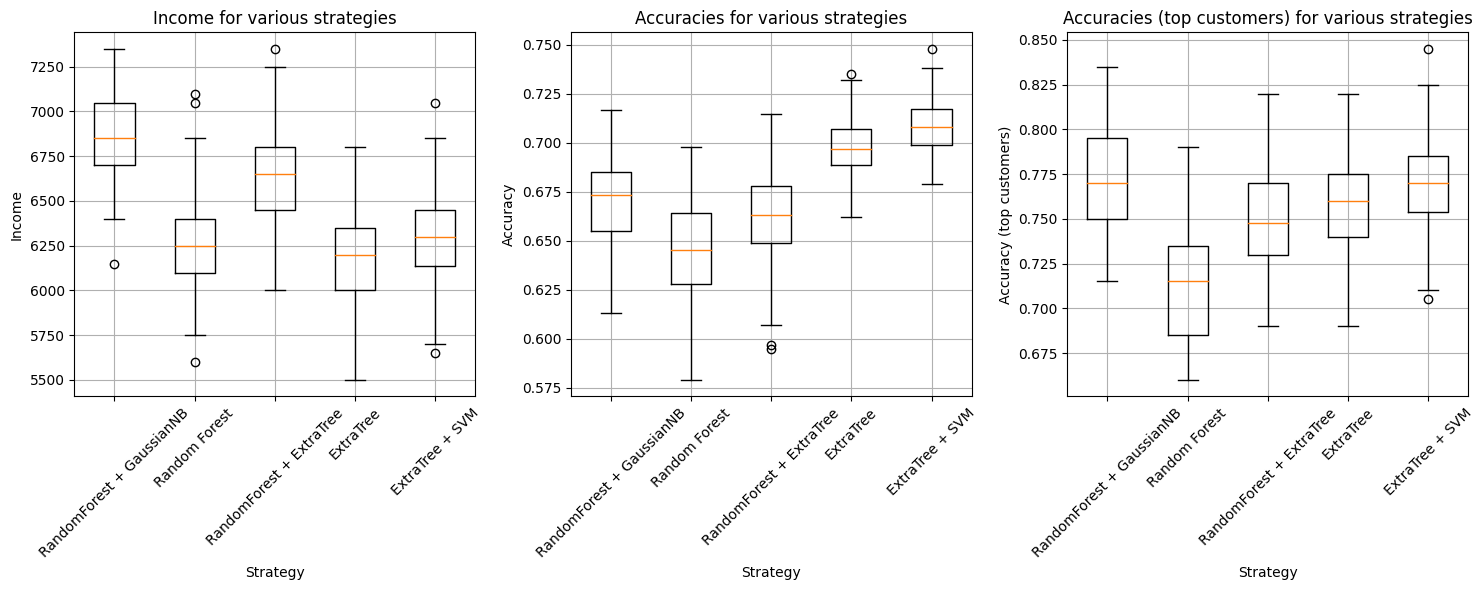

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
axes[0].boxplot(incomes.values(), labels=incomes.keys())
axes[0].set_title('Income for various strategies')
axes[0].set_xlabel('Strategy')
axes[0].set_ylabel('Income')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

axes[1].boxplot(accuracies.values(), labels=accuracies.keys())
axes[1].set_title('Accuracies for various strategies')
axes[1].set_xlabel('Strategy')
axes[1].set_ylabel('Accuracy')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

axes[2].boxplot(accuracies_top.values(), labels=accuracies_top.keys())
axes[2].set_title('Accuracies (top customers) for various strategies')
axes[2].set_xlabel('Strategy')
axes[2].set_ylabel('Accuracy (top customers)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

plt.tight_layout()
plt.show()

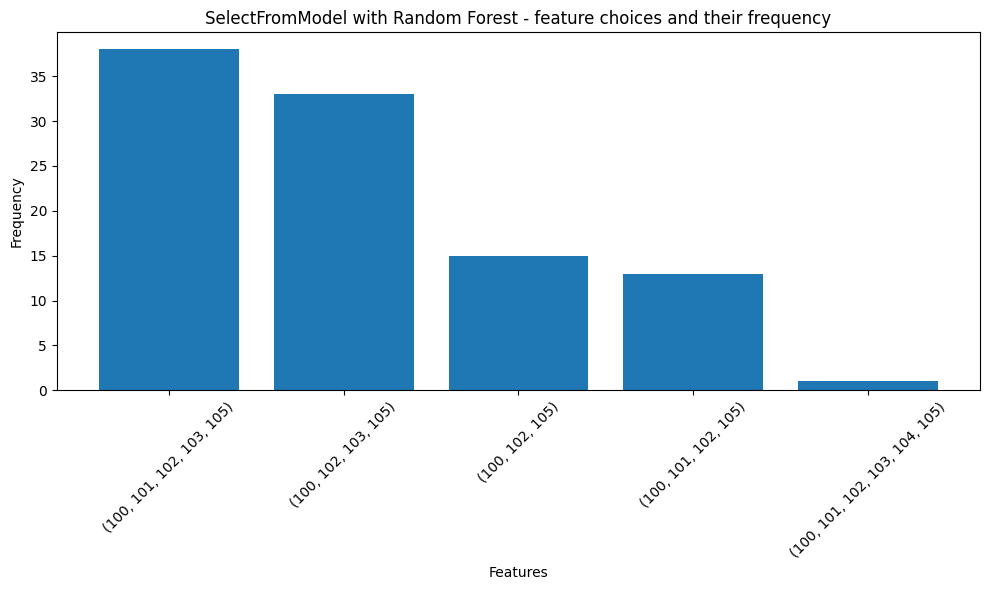

In [82]:
from collections import Counter

data_tuples = [tuple(arr) for arr in selected_features_RF]
counter = Counter(data_tuples)

sets = list(counter.keys())
frequencies = list(counter.values())

plt.figure(figsize=(10, 6))
plt.bar(range(len(sets)), frequencies, tick_label=[str(s) for s in sets])
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('SelectFromModel with Random Forest - feature choices and their frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()